In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib

matplotlib.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (5.0, 5.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'
#%matplotlib inline


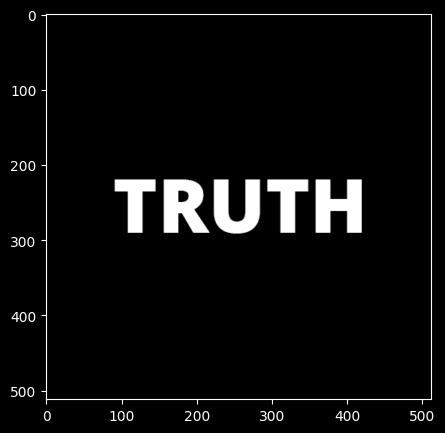

In [2]:
DATA_PATH = "D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"

img = cv2.imread(DATA_PATH + r"\images\truth.png", cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img);

## First Order Derivation

In [3]:
sobelx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
sobely = cv2.Sobel(img, cv2.CV_32F, 0, 1)

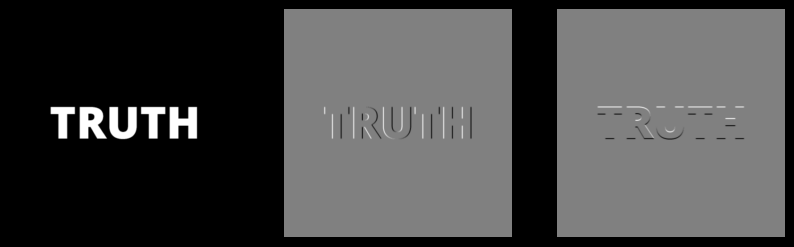

In [4]:
plt.figure(figsize=(10,10))

ax = plt.subplot(131)
plt.imshow(img)
ax.axis('off')

ax = plt.subplot(132)
plt.imshow(sobelx)
ax.axis('off')

ax = plt.subplot(133)
plt.imshow(sobely)
ax.axis('off')
plt.show()

## Second Order Derivation

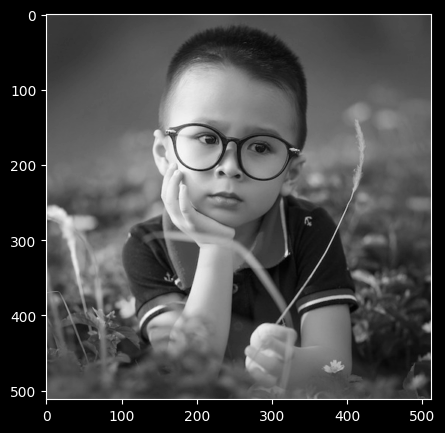

In [5]:
DATA_PATH = "D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"

img = cv2.imread(DATA_PATH + r"\images\sample.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img);

In [6]:
kernelsize = 3

img1 = cv2.GaussianBlur(img, (3,3), 0, 0)
laplacian = cv2.Laplacian(img1, cv2.CV_32F, ksize = kernelsize,
                          scale = 1, delta = 0)

In [7]:
cv2.normalize(laplacian, dst = laplacian, alpha = 0,
              beta = 1, norm_type = cv2.NORM_MINMAX,
              dtype = cv2.CV_32F)

array([[0.51699024, 0.5218446 , 0.526699  , ..., 0.526699  , 0.526699  ,
        0.526699  ],
       [0.5218446 , 0.52912617, 0.526699  , ..., 0.52912617, 0.52912617,
        0.526699  ],
       [0.5218446 , 0.52427185, 0.5218446 , ..., 0.5315534 , 0.5315534 ,
        0.5218446 ],
       ...,
       [0.526699  , 0.5315534 , 0.5218446 , ..., 0.5412621 , 0.5412621 ,
        0.5606796 ],
       [0.526699  , 0.5315534 , 0.5218446 , ..., 0.52427185, 0.53398055,
        0.5412621 ],
       [0.526699  , 0.5315534 , 0.5218446 , ..., 0.49271843, 0.5121359 ,
        0.51699024]], dtype=float32)

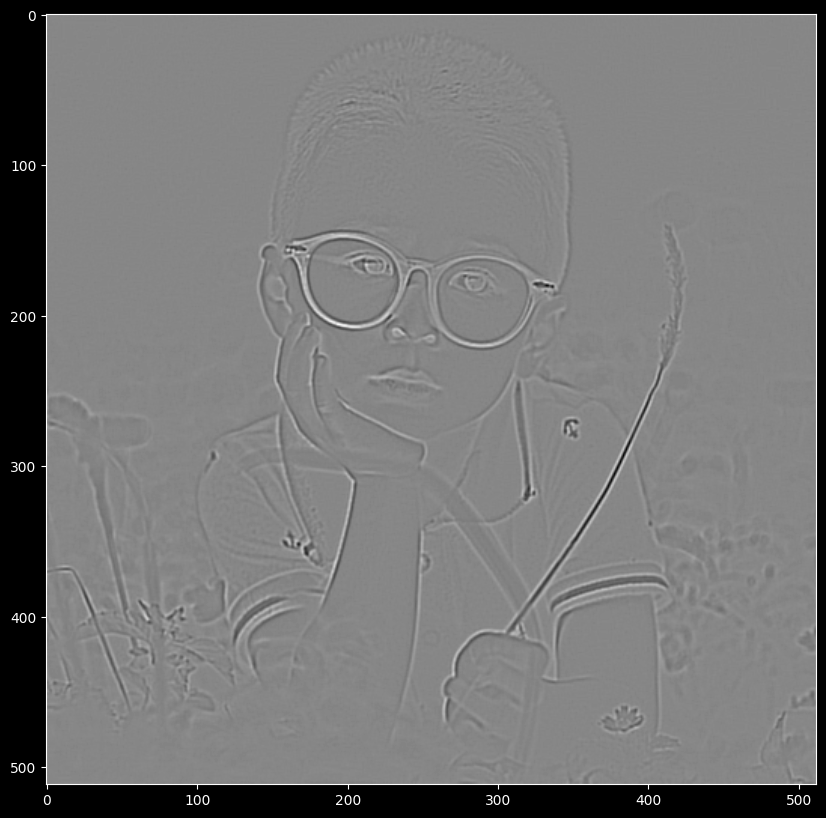

In [8]:
plt.figure(figsize=(20, 10))
plt.imshow(laplacian, cmap = "gray")
plt.show()

## Sharpening Application

In [9]:
DATA_PATH = "D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"

img = cv2.imread(DATA_PATH + r"\images\sample.jpg")

In [10]:
sharpen = np.array(([0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]),
                   dtype="int")

In [11]:
sharpen = cv2.filter2D(img, -1, sharpen)

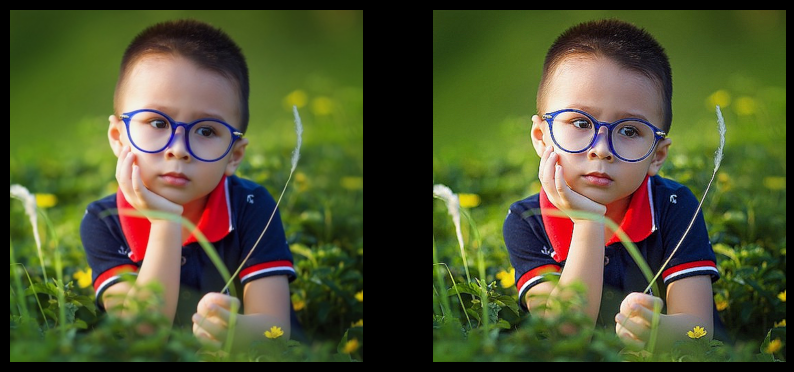

In [12]:
plt.figure(figsize=(10, 10))

ax = plt.subplot(121)
plt.imshow(img[:, :, ::-1])
ax.axis('off')

ax = plt.subplot(122)
plt.imshow(sharpen[:, :, ::-1])
ax.axis('off')
plt.show()

## Canny Edge Detection

In [5]:
import matplotlib.pyplot as plt
import cv2

In [1]:
lowThreshold = 50
highThreshold = 100

maxThreshold = 1000

apertureSizes = [3, 5, 7]
maxapertureIndex = 2
apertureIndex = 0

blurAmount = 0
maxBlurAmount = 20

In [2]:
def applyCanny():
    # Blur the image before edge detection
    if(blurAmount > 0):
        blurredSrc = cv2.GaussianBlur(src,
                                      (2 * blurAmount + 1, 2 * blurAmount + 1), 0);
    else:
        blurredSrc = src.copy()

    # Canny requires aperture size to be odd
    apertureSize = apertureSizes[apertureIndex];

    # Apply canny to detect the images
    edges = cv2.Canny( blurredSrc,
                       lowThreshold,
                       highThreshold,
                       apertureSize = apertureSize )
    plt.imshow(edges[...,::-1])

In [3]:
def updateLowThreshold( *args ):
    global lowThreshold
    lowThreshold = args[0]
    applyCanny()
    pass

def updateHighThreshold(*args):
    global highThreshold
    highThreshold = args[0]
    applyCanny()
    pass

# Function to update blur amount
def updateBlurAmount(*args):
    global blurAmount
    blurAmount = args[0]
    applyCanny()
    pass

# Function to update aperture index
def updateApertureIndex(*args):
    global apertureIndex
    apertureIndex = args[0]
    applyCanny()
    pass

In [6]:
DATA_PATH = "D:\Estudos\OpenCV\Computer Vision - Introduction\w4 - Image Enhancement and Filtering\data"
src = cv2.imread(DATA_PATH + r'images\sample.jpg', cv2.IMREAD_GRAYSCALE)

#edges = src.copy()
# Display images
cv2.namedWindow("Edges", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Edges", src)
# Trackbar to control the low threshold
cv2.createTrackbar( "Low Threshold", "Edges", lowThreshold,
                    maxThreshold, updateLowThreshold)

# Trackbar to control the high threshold
cv2.createTrackbar( "High Threshold", "Edges", highThreshold,
                    maxThreshold, updateHighThreshold)

# Trackbar to control the aperture size
cv2.createTrackbar( "aperture Size", "Edges", apertureIndex,
                    maxapertureIndex, updateApertureIndex)

# Trackbar to control the blur
cv2.createTrackbar( "Blur", "Edges", blurAmount, maxBlurAmount,
                    updateBlurAmount)
k = cv2.waitKey(0)

if k == 27:
    cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


https://docs.opencv.org/4.1.0/d5/d0f/tutorial_py_gradients.html
https://en.wikipedia.org/wiki/Image_gradient
https://en.wikipedia.org/wiki/Image_derivatives
https://en.wikipedia.org/wiki/Sobel_operator
https://de.wikipedia.org/wiki/Laplace-Filter
https://en.wikipedia.org/wiki/Laplace_operator
https://en.wikipedia.org/wiki/Edge_detection
https://www.sciencedirect.com/topics/engineering/edge-detector
https://docs.opencv.org/4.1.0/da/d22/tutorial_py_canny.html
https://www.youtube.com/watch?v=sRFM5IEqR2w
https://www.youtube.com/watch?v=17cOHpSaqi0
https://www.youtube.com/watch?v=Dl5lPdoCXi8
https://www.youtube.com/watch?v=aDY4aBLFOIg
https://www.youtube.com/watch?v=kj4vpaiE1KI